In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# __OUTLIER__

This time, we will illustrate about outlier (global outlier, contextual outlier and collective outlier) and its effect in the modeling especially linear regression.

In [2]:
#Membuat data sederhana tanpa outlier

x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

<ipython-input-2-908edf62199e>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [3]:
#Dijadikan dataframe

df_association = pd.DataFrame({
    'x': x,
    'y': y,
    'y_real': y_real
})

df_association.head()

,x,y,y_real
0,158.61,58.20,57.51
1,164.63,58.89,59.62
2,160.08,59.69,58.03
3,159.84,57.07,57.94
4,157.07,55.30,56.97


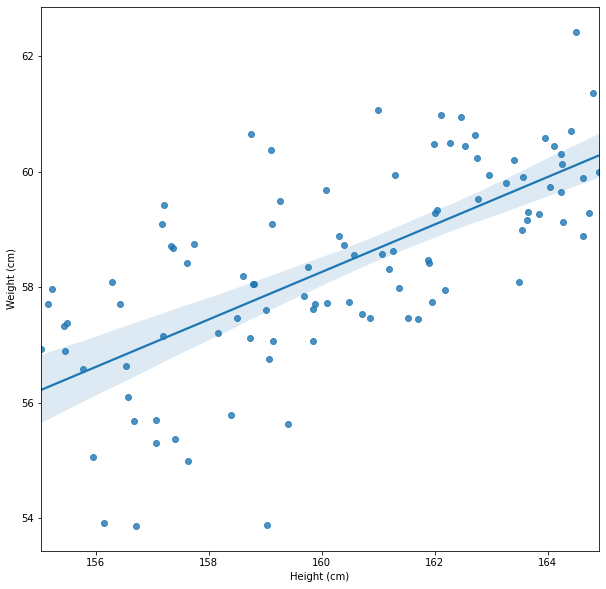

In [4]:
#Membuat plot dari data sederhana yg telah dibuat

plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association)
# sns.lineplot(x='x', y='y_real', data=df_association)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (cm)')

plt.show()

Scatter Plot of two variable without outlier

> ## __1. Global Outlier__

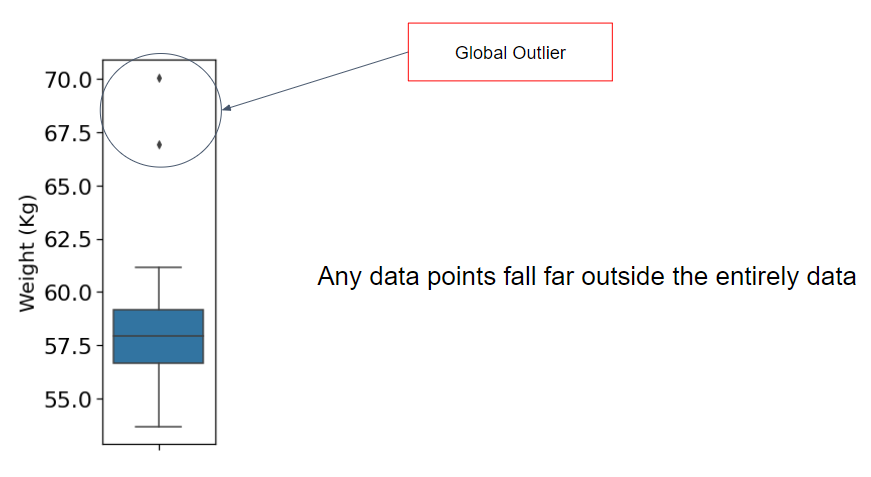

- Bisa dihitung dengan menggunakan IQR

In [5]:
#Membuat data sederhana tanpa outlier

x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_outlier = df_association.append(df_add)
df_association_outlier.head()

<ipython-input-5-a69fd66fcd24>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


,x,y,y_real
0,158.61,58.20,57.51
1,164.63,58.89,59.62
2,160.08,59.69,58.03
3,159.84,57.07,57.94
4,157.07,55.30,56.97


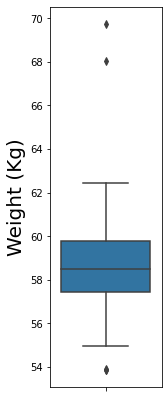

In [6]:
#Membuat boxplot dengan data yg ada oulier (weight)

plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

plt.show()

#terlihat ada outlier (dilihatnya secara global aja)

Global outlier for height

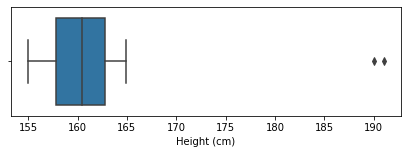

In [7]:
#Membuat boxplot dengan data yg ada oulier (height)

plt.figure(figsize=(7,2))
sns.boxplot(x=df_association_outlier['x'])
plt.xlabel('Height (cm)')

plt.show()
#terlihat ada outlier secara global

> ## __2. Contextual Outlier__

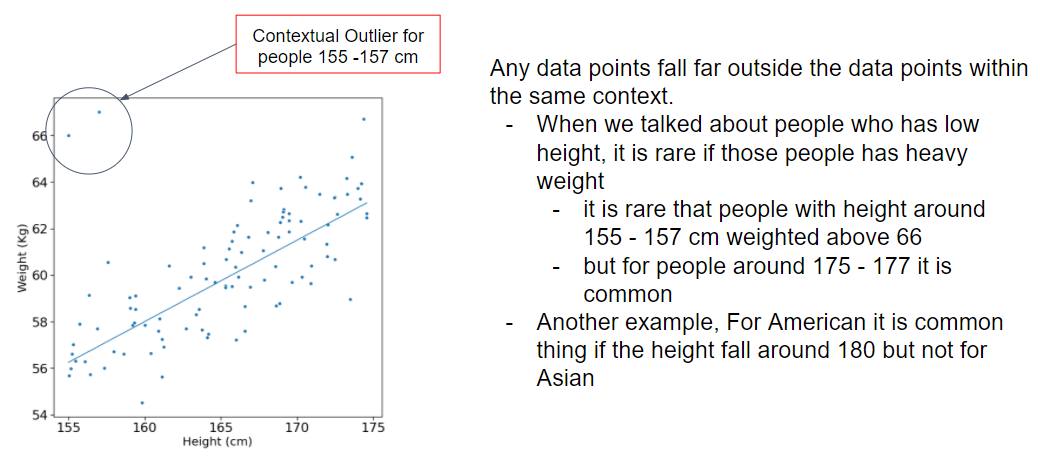

In [8]:
#Membuat data sederhana

x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_association = pd.DataFrame({'x': x, 'y': y, 'y_real': y_real})

<ipython-input-8-60d58cb6bcd1>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [9]:
#Membuat data sederhana (lanjutan)

x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_contextual = df_association.append(df_add)
df_association_contextual.head()

,x,y,y_real
0,156.15,56.89,56.65
1,157.48,55.09,57.12
2,163.01,56.73,59.05
3,158.33,56.52,57.42
4,168.52,61.19,60.98


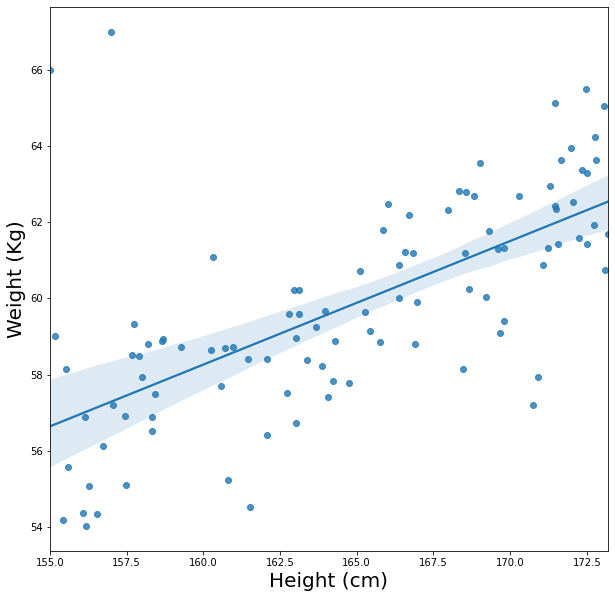

In [10]:
#Membuat plot dari data sederhana yg dibuat

plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association_contextual)
# sns.lineplot(x='x', y='y_real', data=df_association_contextual)
plt.xlabel('Height (cm)', fontsize=20)
plt.ylabel('Weight (Kg)', fontsize=20)

plt.show()

> ## __Outlier in LR: Influential Observation (Break the pattern)__

In [11]:
#Membuat data sederhana

x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_influenced = df_association.append(df_add)
df_association_influenced.head()

,x,y,y_real
0,156.15,56.89,56.65
1,157.48,55.09,57.12
2,163.01,56.73,59.05
3,158.33,56.52,57.42
4,168.52,61.19,60.98


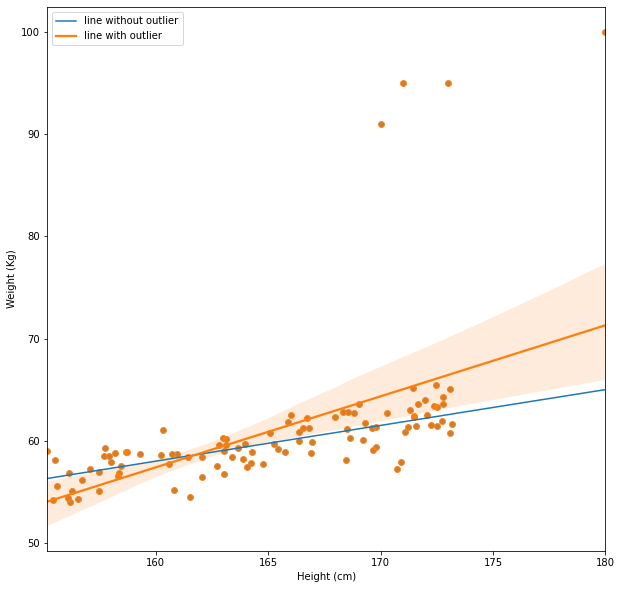

In [12]:
#Membuat plot dengan data sederhana

plt.figure(figsize=(10,10))
sns.scatterplot(x='x', y='y', data=df_association_influenced)
sns.lineplot(x='x', y='y_real', data=df_association_influenced)
sns.regplot(x='x', y='y', data = df_association_influenced)
plt.legend(['line without outlier', 'line with outlier'], loc = 'upper left')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (Kg)')
plt.show()

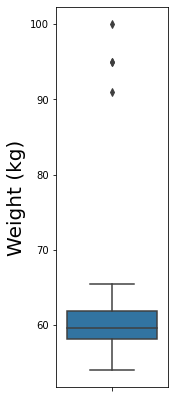

In [13]:
#Membuat boxplot

plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_influenced['y'])
plt.ylabel('Weight (kg)', fontsize = 20)

plt.show()